In [1]:
library(geoband)

In [2]:
GetCompasData('SBJ_2003_001', '3', 'sk_emd_od.csv')
flow <- read.csv('sk_emd_od.csv', header=T)
head(flow)

std_ymd,tm_trm,org,dst,pop
<int>,<fct>,<fct>,<fct>,<dbl>
20180703,00_05,기배동,남양읍,11.04
20180703,00_05,기배동,동탄1동,13.80
20180703,00_05,기배동,동탄2동,24.84
20180703,00_05,기배동,동탄3동,8.28
20180703,00_05,기배동,동탄4동,2.76
20180703,00_05,기배동,동탄5동,8.28


In [3]:
dim(flow)

[1] 9066    5

In [4]:
summary(flow)

    std_ymd           tm_trm          org            dst      
 Min.   :20180701   00_05:2048   봉담읍 : 384   봉담읍 : 384  
 1st Qu.:20180701   06_11:2359   향남읍 : 384   향남읍 : 384  
 Median :20180702   12_17:2364   동탄4동: 381   남양읍 : 381  
 Mean   :20180702   18_23:2295   진안동 : 381   우정읍 : 381  
 3rd Qu.:20180704                남양읍 : 379   팔탄면 : 377  
 Max.   :20180704                동탄2동: 379   동탄6동: 375  
                                 (Other):6778   (Other):6784  
      pop          
 Min.   :    2.76  
 1st Qu.:   16.56  
 Median :   60.72  
 Mean   :  418.58  
 3rd Qu.:  298.01  
 Max.   :11190.82  
                   

In [5]:
org_dst <- vector(mode='character', nrow(flow))
for (i in 1:nrow(flow)){
    org_dst[i] <- paste(flow$org[i], flow$dst[i], sep="_")
}
flow['org_dst'] <- org_dst
flow <- flow[,c(1,2,3,4,6,5)]
head(flow)

std_ymd,tm_trm,org,dst,org_dst,pop
<int>,<fct>,<fct>,<fct>,<chr>,<dbl>
20180703,00_05,기배동,남양읍,기배동_남양읍,11.04
20180703,00_05,기배동,동탄1동,기배동_동탄1동,13.80
20180703,00_05,기배동,동탄2동,기배동_동탄2동,24.84
20180703,00_05,기배동,동탄3동,기배동_동탄3동,8.28
20180703,00_05,기배동,동탄4동,기배동_동탄4동,2.76
20180703,00_05,기배동,동탄5동,기배동_동탄5동,8.28


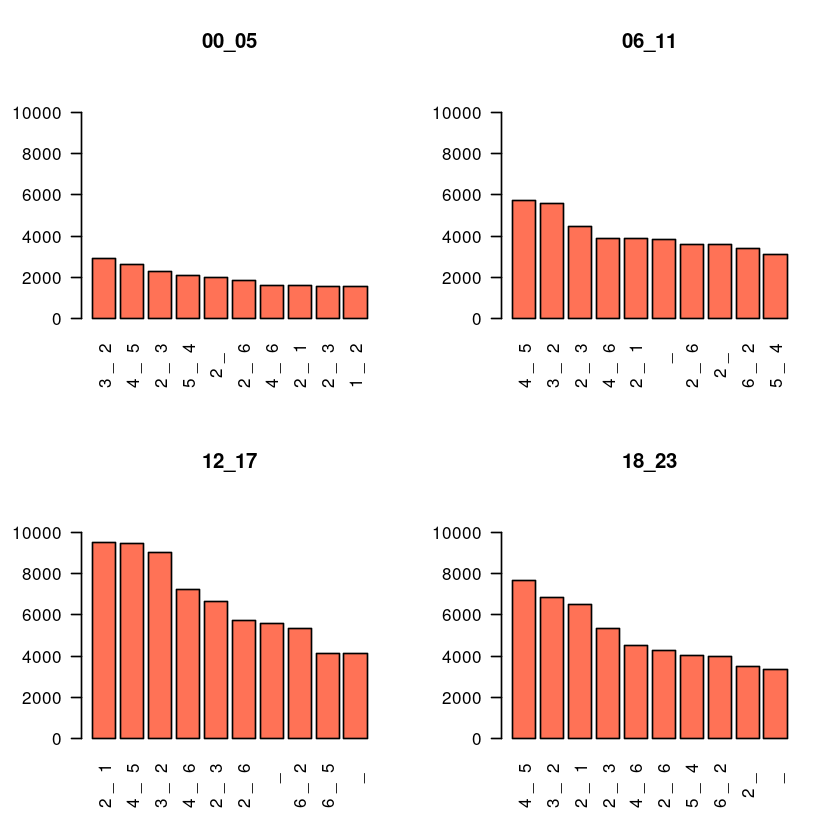

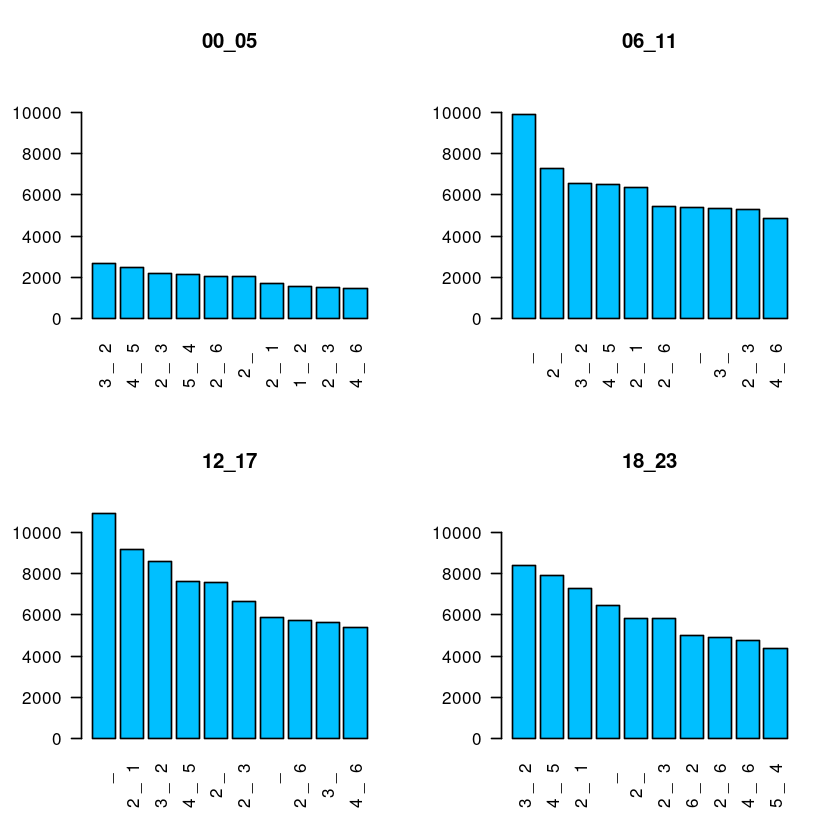

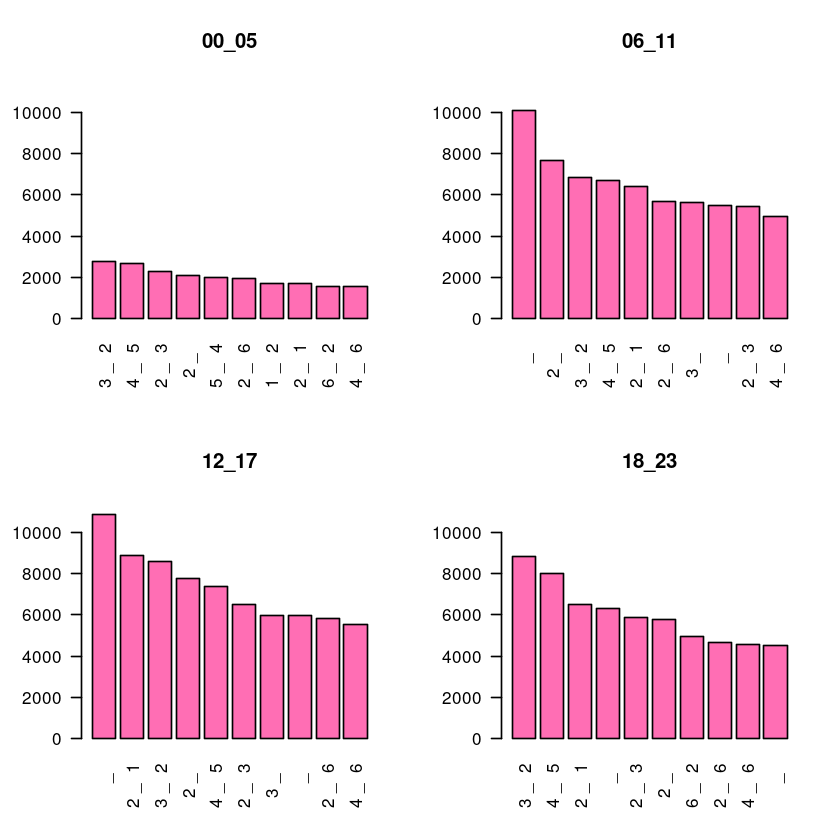

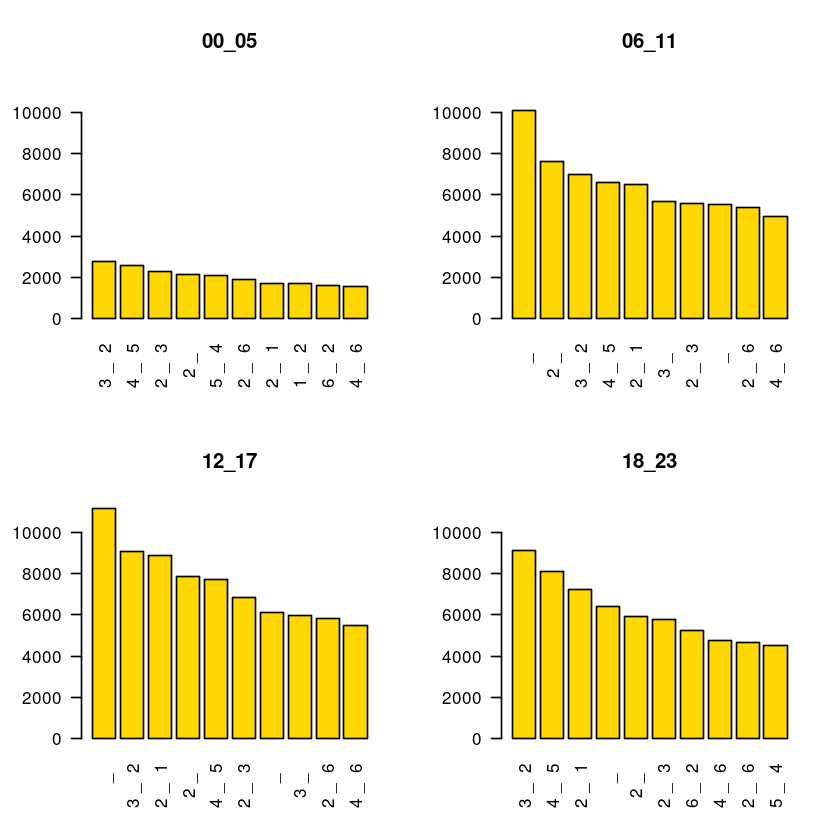

In [81]:
flow_ls <- list()
par(mfrow=c(2,2))
for (i in 1:4){
    for (j in 1:4){
        date <- sort(unique(flow$std_ymd))
        time <- unique(flow$tm_trm)
        color <- c("coral1", "deepskyblue", "hotpink1", "gold")
        tmp <- subset(flow, (flow$std_ymd == date[i] & flow$tm_trm == time[j]))
        tmp_sort <- tmp[order(-tmp$pop),][1:10,]
        flow_ls[[paste(date[i], time[j], sep=" ")]] <- tmp_sort
        barplot(tmp_sort$pop, ylim=c(0,11500), names.arg=tmp_sort$org_dst, las=2, main=time[j], col=color[i])
    }
}

In [7]:
flow_ls

,std_ymd,tm_trm,org,dst,org_dst,pop
,<int>,<fct>,<fct>,<fct>,<chr>,<dbl>
6877,20180701,00_05,동탄3동,동탄2동,동탄3동_동탄2동,2902.53
6903,20180701,00_05,동탄4동,동탄5동,동탄4동_동탄5동,2637.69
6853,20180701,00_05,동탄2동,동탄3동,동탄2동_동탄3동,2259.66
6927,20180701,00_05,동탄5동,동탄4동,동탄5동_동탄4동,2088.63
6859,20180701,00_05,동탄2동,반월동,동탄2동_반월동,1994.80
6856,20180701,00_05,동탄2동,동탄6동,동탄2동_동탄6동,1837.56
6904,20180701,00_05,동탄4동,동탄6동,동탄4동_동탄6동,1614.08
6852,20180701,00_05,동탄2동,동탄1동,동탄2동_동탄1동,1589.22
7061,20180701,00_05,병점2동,동탄3동,병점2동_동탄3동,1572.69


In [29]:
org <- with(flow, aggregate(pop, by=list(org=org, time=tm_trm), sum))
head(org)

org,time,x
<fct>,<fct>,<dbl>
기배동,00_05,5493.79
남양읍,00_05,6882.33
동탄1동,00_05,14891.40
동탄2동,00_05,37116.23
동탄3동,00_05,29275.00
동탄4동,00_05,21046.99


In [82]:
org$org

[1] 기배동  남양읍  동탄1동 동탄2동 동탄3동 동탄4동 동탄5동 동탄6동 마도면 
 [10] 매송면  반월동  병점1동 병점2동 봉담읍  비봉면  서신면  송산면  양감면 
 [19] 우정읍  장안면  정남면  진안동  팔탄면  향남읍  화산동  기배동  남양읍 
 [28] 동탄1동 동탄2동 동탄3동 동탄4동 동탄5동 동탄6동 마도면  매송면  반월동 
 [37] 병점1동 병점2동 봉담읍  비봉면  서신면  송산면  양감면  우정읍  장안면 
 [46] 정남면  진안동  팔탄면  향남읍  화산동  기배동  남양읍  동탄1동 동탄2동
 [55] 동탄3동 동탄4동 동탄5동 동탄6동 마도면  매송면  반월동  병점1동 병점2동
 [64] 봉담읍  비봉면  서신면  송산면  양감면  우정읍  장안면  정남면  진안동 
 [73] 팔탄면  향남읍  화산동  기배동  남양읍  동탄1동 동탄2동 동탄3동 동탄4동
 [82] 동탄5동 동탄6동 마도면  매송면  반월동  병점1동 병점2동 봉담읍  비봉면 
 [91] 서신면  송산면  양감면  우정읍  장안면  정남면  진안동  팔탄면  향남읍 
[100] 화산동 
25 Levels: 기배동 남양읍 동탄1동 동탄2동 동탄3동 동탄4동 동탄5동 ... 화산동

In [58]:
df4plot <- function(df){
    time <- c("00_05", "06_11", "12_17", "18_23")
    tmp1 <- df[which(df$time==time[1]),3]
    tmp2 <- df[which(df$time==time[2]),3]
    tmp3 <- df[which(df$time==time[3]),3]
    tmp4 <- df[which(df$time==time[4]),3]
    df4plot <- cbind(tmp1, tmp2, tmp3, tmp4)
    colnames(df4plot) <- time
    rownames(df4plot) <- unique(df[,1])
    return(df4plot)    
}

In [59]:
org4plot <- df4plot(org)
head(org4plot)

,00_05,06_11,12_17,18_23
기배동,5493.79,23211.00,29582.03,20045.98
남양읍,6882.33,44902.72,52771.53,27178.43
동탄1동,14891.40,33750.12,38294.46,35101.99
동탄2동,37116.23,122617.63,157103.57,114034.03
동탄3동,29275.00,98577.62,125095.45,96196.55
동탄4동,21046.99,83742.32,113267.20,83924.29


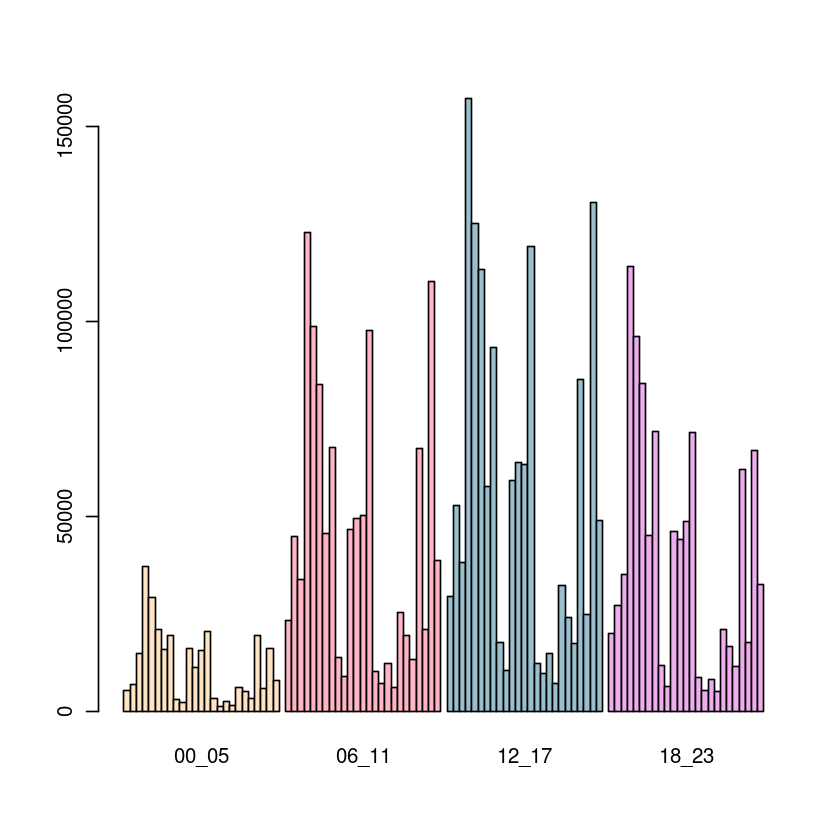

In [77]:
barplot(org4plot, beside=T, col=rep(c("bisque1", "pink1", "lightblue3", "plum2"), each=nrow(org4plot)))

In [60]:
dst <- with(flow, aggregate(pop, by=list(dst=dst, time=tm_trm), sum))
head(dst)

dst,time,x
<fct>,<fct>,<dbl>
기배동,00_05,5683.95
남양읍,00_05,7216.15
동탄1동,00_05,14212.93
동탄2동,00_05,34053.43
동탄3동,00_05,26775.06
동탄4동,00_05,14427.72


In [61]:
dst4plot <- df4plot(dst)
head(dst4plot)

,00_05,06_11,12_17,18_23
기배동,5683.95,16138.98,19359.02,14383.97
남양읍,7216.15,43338.25,50942.33,28566.17
동탄1동,14212.93,69372.63,106465.58,70619.60
동탄2동,34053.43,93941.98,131446.37,115203.63
동탄3동,26775.06,66045.07,85706.19,71601.90
동탄4동,14427.72,35275.97,45589.47,38448.85


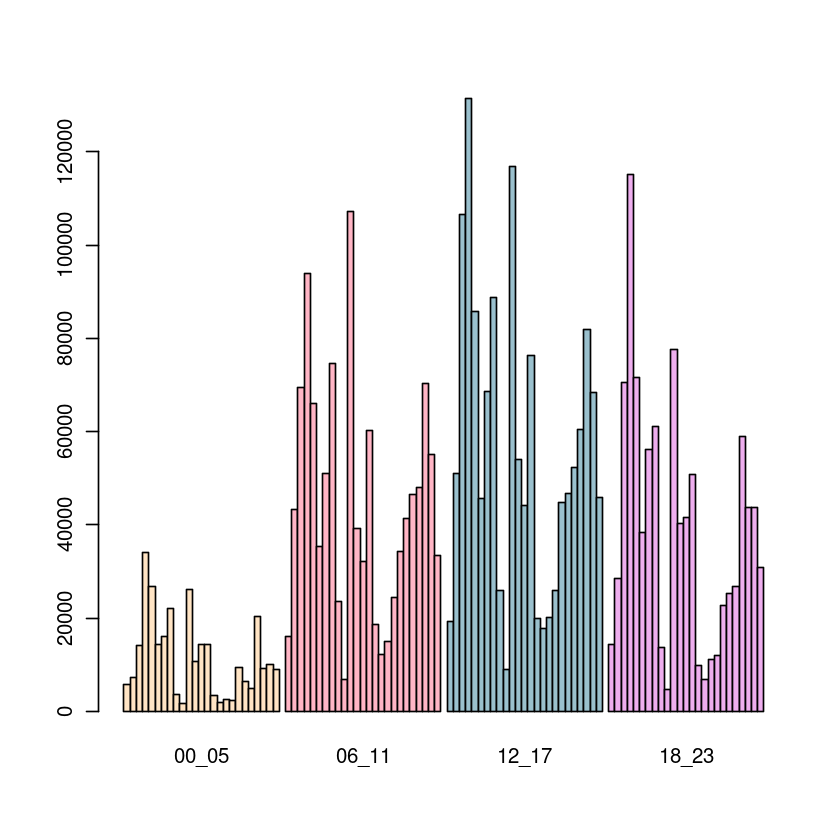

In [79]:
barplot(dst4plot, beside=T, col=rep(c("bisque1", "pink1", "lightblue3", "plum2"), each=nrow(dst4plot)))

In [63]:
diff4plot <- org4plot-dst4plot
head(diff4plot)

,00_05,06_11,12_17,18_23
기배동,-190.16,7072.02,10223.01,5662.01
남양읍,-333.82,1564.47,1829.20,-1387.74
동탄1동,678.47,-35622.51,-68171.12,-35517.61
동탄2동,3062.80,28675.65,25657.20,-1169.60
동탄3동,2499.94,32532.55,39389.26,24594.65
동탄4동,6619.27,48466.35,67677.73,45475.44


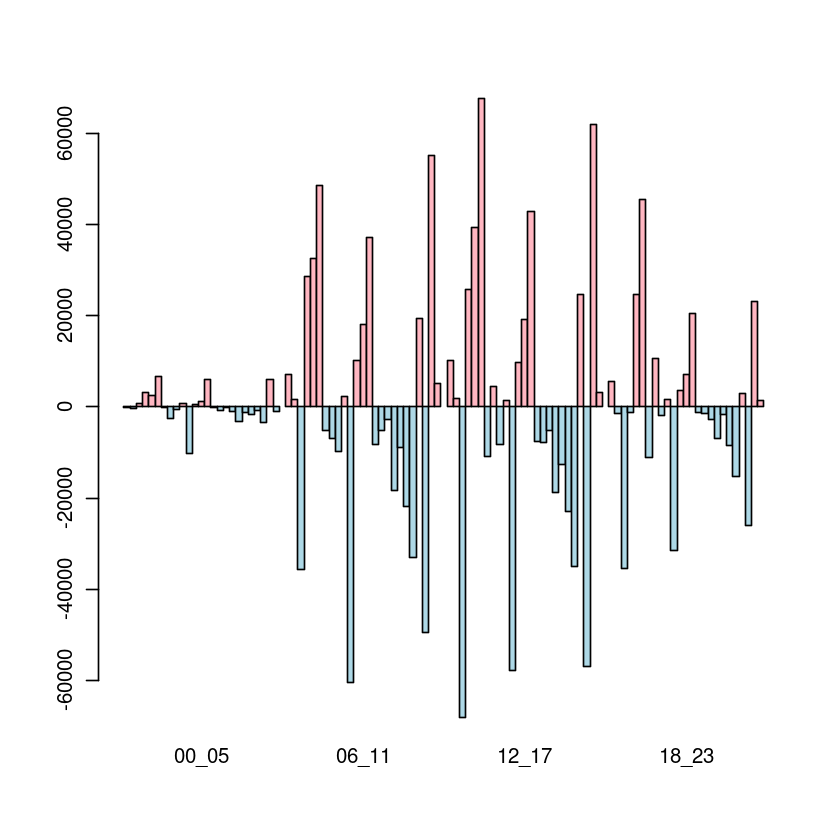

In [67]:
barplot(diff4plot, beside=T, col=ifelse(diff4plot>0,"lightpink", "lightblue"))

In [8]:
GetCompasData('SBJ_2003_001', '1', 'TripChain.csv')
tripchain <- read.csv("TripChain.csv", header=T)
head(tripchain)

암호화카드번호...,X...트랜잭션ID...,X...환승횟수...,X...교통카드발행사ID...,X...총이용객수...,X...사용자구분...,X...교통수단CD1...,X...교통수단CD2...,X...교통수단CD3...,X...교통수단CD4...,⋯,X...하차역ID1...,X...하차역ID2...,X...하차역ID3...,X...하차역ID4...,X...하차역ID5...,X...최초승차역ID...,X...최종하차역ID...,X...총이용금액...,X...수집건수...,X...트립체인완료코드
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<fct>
900079696430,56,2,9000923,1,1,500,500,NA,NA,⋯,NA,NA,NA,NA,NA,NA,4116708,1350,2,;
900079697651,5,1,9000923,1,1,500,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,4117269,1250,1,;
900079698254,32,1,9000923,1,1,500,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,4107936,1550,1,;
900079699257,80,1,9000923,1,1,500,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,4116717,1250,1,;
900079701419,64,1,9000923,1,1,530,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,4116848,2050,1,;
900079701419,65,1,9000923,1,1,530,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,4100121,2050,1,;


In [9]:
colnm <- colnames(tripchain)
colnm

[1] "암호화카드번호..."       "X...트랜잭션ID..."      
 [3] "X...환승횟수..."         "X...교통카드발행사ID..."
 [5] "X...총이용객수..."       "X...사용자구분..."      
 [7] "X...교통수단CD1..."      "X...교통수단CD2..."     
 [9] "X...교통수단CD3..."      "X...교통수단CD4..."     
[11] "X...교통수단CD5..."      "X...버스노선ID1..."     
[13] "X...버스노선ID2..."      "X...버스노선ID3..."     
[15] "X...버스노선ID4..."      "X...버스노선ID5..."     
[17] "X...차량ID1..."          "X...차량ID2..."         
[19] "X...차량ID3..."          "X...차량ID4..."         
[21] "X...차량ID5..."          "X...총통행거리..."      
[23] "X...총탑승시간..."       "X...총소요시간..."      
[25] "X...승차일시1..."        "X...승차일시2..."       
[27] "X...승차일시3..."        "X...승차일시4..."       
[29] "X...승차일시5..."        "X...하차일시1..."       
[31] "X...하차일시2..."        "X...하차일시3..."       
[33] "X...하차일시4..."        "X...하차일시5..."       
[35] "X...최초승차일시..."     "X...최종하차일시..."    
[37] "X...승차역ID1..."        "X...승차역ID2..."       
[39] "X...승차역ID3..."        "X...승차역ID4..."       
[41] "X...승차역ID5..."        "X...하차역ID1..."       
[43] "X...하차역ID2..."        "X...하차역ID3..."       
[45] "X...하차역ID4..."        "X...하차역ID5..."       
[47] "X...최초승차역ID..."     "X...최종하차역ID..."    
[49] "X...총이용금액..."       "X...수집건수..."        
[51] "X...트립체인완료코드"

In [10]:
for (i in (1:length(colnm))){
    if (i==1) {
        colnm[i] <- substr(colnm[i], 1, nchar(colnm[i])-3)
    }
    else if (i==length(colnm)) {
        colnm[i] <- substr(colnm[i], 5, nchar(colnm[i]))
    }
    else {
        colnm[i] <- substr(colnm[i], 5, nchar(colnm[i])-3)
    }
}
colnm

[1] "암호화카드번호"   "트랜잭션ID"       "환승횟수"         "교통카드발행사ID"
 [5] "총이용객수"       "사용자구분"       "교통수단CD1"      "교통수단CD2"     
 [9] "교통수단CD3"      "교통수단CD4"      "교통수단CD5"      "버스노선ID1"     
[13] "버스노선ID2"      "버스노선ID3"      "버스노선ID4"      "버스노선ID5"     
[17] "차량ID1"          "차량ID2"          "차량ID3"          "차량ID4"         
[21] "차량ID5"          "총통행거리"       "총탑승시간"       "총소요시간"      
[25] "승차일시1"        "승차일시2"        "승차일시3"        "승차일시4"       
[29] "승차일시5"        "하차일시1"        "하차일시2"        "하차일시3"       
[33] "하차일시4"        "하차일시5"        "최초승차일시"     "최종하차일시"    
[37] "승차역ID1"        "승차역ID2"        "승차역ID3"        "승차역ID4"       
[41] "승차역ID5"        "하차역ID1"        "하차역ID2"        "하차역ID3"       
[45] "하차역ID4"        "하차역ID5"        "최초승차역ID"     "최종하차역ID"    
[49] "총이용금액"       "수집건수"         "트립체인완료코드"

In [11]:
colnames(tripchain) <- colnm
dim(tripchain)

[1] 1048575      51

In [12]:
summary(tripchain) #na 많은 열은 삭제?

 암호화카드번호        트랜잭션ID        환승횟수     교통카드발행사ID 
 Min.   :1.000e+11   Min.   :  1.00   Min.   :1.000   Min.   :1000100  
 1st Qu.:9.001e+11   1st Qu.: 21.00   1st Qu.:1.000   1st Qu.:3104000  
 Median :9.005e+11   Median : 45.00   Median :1.000   Median :9000901  
 Mean   :8.243e+11   Mean   : 46.63   Mean   :1.527   Mean   :7042798  
 3rd Qu.:9.005e+11   3rd Qu.: 71.00   3rd Qu.:2.000   3rd Qu.:9000923  
 Max.   :9.005e+11   Max.   :699.00   Max.   :5.000   Max.   :9000932  
                                                                       
   총이용객수       사용자구분     교통수단CD1     교통수단CD2    
 Min.   : 1.000   Min.   :1.000   Min.   :105.0   Min.   :105.0   
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:500.0   1st Qu.:500.0   
 Median : 1.000   Median :1.000   Median :500.0   Median :500.0   
 Mean   : 1.015   Mean   :1.299   Mean   :482.1   Mean   :437.6   
 3rd Qu.: 1.000   3rd Qu.:1.000   3rd Qu.:500.0   3rd Qu.:500.0   
 Max.   :16.000   Max.   :8.000   Max.   :584.0   Max.   :584.

In [ ]:
#

In [13]:
cost_tab <- table(tripchain$총이용금액)
cost_tab_over10000 <- cost_tab[cost_tab>10000]
cost_tab_over10000 #나머지는 뭐지... 얘네 값만 행추출?


   870   1250   1350   1450   1550   1650   1750   1850   1950   2050   2400 
 75070 602288  97824  46463  29601  21750  15503  13960  10338  34169  15450 
  2500 
 12171 

In [14]:
table(substr(tripchain$최초승차일시, 1, 8)) #1일~4일의 데이터


20180701 20180702 20180703 20180704 
  181022   365026   404503    98024 

In [20]:
table(tripchain$승차역ID1)


      0     150     151     152     153     154     155     156     157     158 
      1     222     199     304     122     108      48      40      44      46 
    159     201     202     203     204     205     206     207     208     209 
     34      32      70      33      26      62      31      18      68      47 
    210     211     212     213     214     215     216     217     218     219 
     44     142     137      45     104      72     336      85      85     752 
    220     221     222     223     224     225     226     227     228     229 
    633     433     508     257     187     110     125     111     200      65 
    230     231     232     233     234     235     236     237     238     239 
    180      80     295     162     388     100     115      59     233     492 
    240     241     242     243     244     245     246     247     248     249 
    324      90      19      17       4       2       6       5      40      37 
    250     309     310    

In [17]:
GetCompasData('SBJ_2003_001', '2', 'stations_table.csv')
station_all <- read.csv('stations_table.csv', header=T)
station <- subset(station, station$시군명 == '화성시')
head(station)
dim(station)

,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
3774,277101618,화성시,고온리종점(경유),,NA,,,,37.03840,126.7502,,7101618
3775,277101619,화성시,호곡리(경유),,NA,,,,37.11838,126.7740,,NA
3790,277101636,화성시,기흥동탄IC(경유),,NA,,,,37.21662,127.0970,,NA
3796,277101644,화성시,발안삼거리.바다마트(경유),,NA,,,,37.13678,126.9086,,NA
3821,277101677,화성시,원안1리(경유),,NA,,,,37.10380,126.7784,,NA
3822,277101678,화성시,점촌교차로(경유),,NA,,,,37.14180,126.9168,,NA


[1] 2655   12

In [22]:
GetCompasData('SBJ_2003_001', '8', 'routestationinfo.csv')
routestation <- read.csv('routestationinfo.csv', header=T)
head(routestation)

seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no
<int>,<int>,<fct>,<int>,<fct>,<int>,<int>
65286,228000018,10-4,1,용인터미널,228001552,47634
65287,228000018,10-4,2,용인터미널(경유),277102443,NA
65288,228000018,10-4,3,포브스병원,228000443,29439
65289,228000018,10-4,4,제일교회,228000665,29881
65290,228000018,10-4,5,라이프아파트,228000664,29457
65291,228000018,10-4,6,송담대,228000663,29464
